In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [10]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_cat_train.shape

(60000, 10)

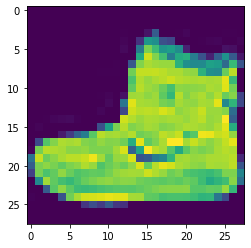

In [12]:
plt.imshow(x_train[0])

In [13]:
x_train=x_train/250
x_test=x_test/250

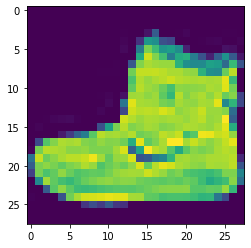

In [14]:
plt.imshow(x_train[0])

In [15]:
x_train[0].shape

(28, 28)

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
Model=Sequential()

Model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))


Model.add(Flatten())

Model.add(Dense(128,activation='relu'))
Model.add(Dense(10,activation='softmax'))

Model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
Early_Stopping=EarlyStopping(monitor='val_loss',patience=2)

In [24]:
Model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[Early_Stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 45s 751us/sample - loss: 0.4127 - accuracy: 0.8546 - val_loss: 0.3408 - val_accuracy: 0.8791
Epoch 2/15
60000/60000 [==============================] - 44s 729us/sample - loss: 0.2839 - accuracy: 0.8972 - val_loss: 0.2842 - val_accuracy: 0.8955
Epoch 3/15
60000/60000 [==============================] - 44s 727us/sample - loss: 0.2394 - accuracy: 0.9115 - val_loss: 0.2677 - val_accuracy: 0.9012
Epoch 4/15
60000/60000 [==============================] - 44s 730us/sample - loss: 0.2040 - accuracy: 0.9242 - val_loss: 0.2855 - val_accuracy: 0.8985
Epoch 5/15
60000/60000 [==============================] - 44s 735us/sample - loss: 0.1772 - accuracy: 0.9338 - val_loss: 0.3000 - val_accuracy: 0.8963


In [25]:
Metrics=pd.DataFrame(Model.history.history)

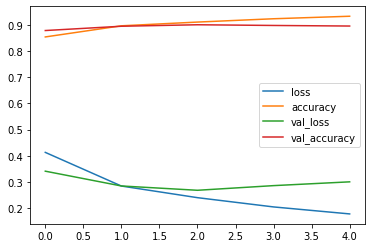

In [26]:
Metrics.plot()

In [27]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


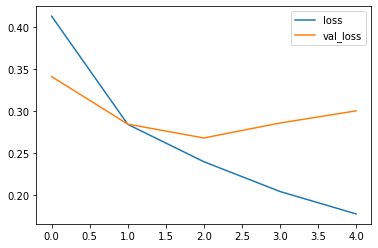

In [28]:
Metrics[['loss','val_loss']].plot()

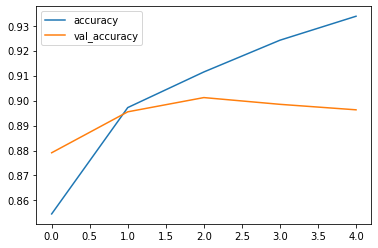

In [29]:
Metrics[['accuracy','val_accuracy']].plot()

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
y_pred=Model.predict_classes(x_test)

In [32]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [33]:
y_pred1=Model.predict(x_test)

In [34]:
y_pred1

array([[2.4864025e-07, 7.8164078e-08, 2.1152357e-07, ..., 1.7411574e-05,
        1.9643712e-06, 9.9995089e-01],
       [1.3701450e-06, 2.0797450e-12, 9.9998975e-01, ..., 2.2459560e-18,
        1.2781662e-13, 2.9138784e-13],
       [2.9325607e-08, 1.0000000e+00, 1.3155270e-10, ..., 9.4802369e-17,
        6.4001013e-11, 7.4261658e-13],
       ...,
       [3.8800451e-07, 2.0657547e-09, 6.4420283e-06, ..., 5.4622534e-10,
        9.9996006e-01, 1.7152292e-12],
       [3.3859099e-08, 9.9999940e-01, 1.3855493e-08, ..., 2.3349467e-12,
        4.9024288e-11, 1.7794223e-09],
       [3.4487961e-04, 2.2296052e-05, 1.9224765e-03, ..., 4.2503074e-02,
        2.9869766e-03, 3.9103637e-03]], dtype=float32)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.79      0.83      1000
           3       0.92      0.91      0.92      1000
           4       0.83      0.82      0.83      1000
           5       0.97      0.98      0.98      1000
           6       0.68      0.75      0.71      1000
           7       0.99      0.88      0.93      1000
           8       0.99      0.97      0.98      1000
           9       0.89      0.99      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [36]:
print(confusion_matrix(y_test,y_pred))

[[894   2   9  10   9   2  72   0   2   0]
 [  0 982   0   9   6   0   2   0   1   0]
 [ 14   1 790   8  57   0 130   0   0   0]
 [  9   7  10 911  42   0  21   0   0   0]
 [  1   1  50  18 825   0 105   0   0   0]
 [  0   0   0   0   0 984   0   4   0  12]
 [134   1  36  24  55   0 747   0   3   0]
 [  0   0   0   0   0  18   0 876   1 105]
 [  7   1   2   6   2   2  13   1 966   0]
 [  0   0   0   0   0   4   1   7   0 988]]


In [41]:
y_pred2=Model.predict_classes(x_test[5].reshape(1,28,28,1))

In [42]:
# PREDICTED:
y_pred2

array([1], dtype=int64)

In [43]:
# ACTUAL TEST:
y_test[5]

1

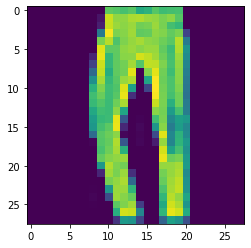

In [45]:
# INPUT TEST:
plt.imshow(x_test[5].reshape(28,28))